# **1)Modelaciòn: Clasificaciòn**

# **Modelación**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

*  Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos

<img src="https://d33wubrfki0l68.cloudfront.net/478f2689f1b9903ce2feed61a1f5e9c9deb2bcc9/55b03/post/commentary/inference-vs-prediction_files/figure-html/unnamed-chunk-1-1.png" width=500>

**Flujos de trabajo para inferencia y predicción**

Los flujos de trabajo básicos para la inferencia y la predicción se describen en las siguientes secciones.

**Inferencia**
* Modelado: Razonar sobre el proceso de generación de datos y elegir el modelo estocástico que mejor se aproxime al proceso de generación de datos.
* Validación del modelo: evalúe la validez del modelo estocástico mediante análisis de residuos o pruebas de bondad de ajuste.
* Inferencia: utilice el modelo estocástico para comprender el proceso de generación de datos.

**Predicción**

* Modelado: considere varios modelos diferentes y diferentes configuraciones de parámetros.
* Selección de modelo: identifique el modelo con el mayor rendimiento predictivo utilizando conjuntos de validación / prueba; seleccione el modelo con el rendimiento más alto en el equipo de prueba.
* Predicción: aplique el modelo seleccionado en datos nuevos con la expectativa de que el modelo seleccionado también se generalice a los datos no vistos.

## **Librerias**

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics


## **Importar Datos**

In [3]:
df=pd.read_csv("BaseModelos.csv",index_col=False)

In [4]:
df.head()

,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,Educacion_Media,Educacion_Baja,Poblacion_Empresario,...,Mes Alta_Octubre,Mes Alta_Septiembre,Dia Semana_Jueves,Dia Semana_Lunes,Dia Semana_Martes,Dia Semana_Miércoles,Dia Semana_Sábado,Dia Semana_Viernes,CompraSeguro,Tipo Archivo
0,0.00,617.55,0.00,75.10,18.27,6.63,2.75,39.20,58.05,23.70,...,0,0,0,1,0,0,0,0,0.0,Entrenamiento
1,973.61,0.00,386.87,62.29,32.55,5.17,40.84,41.12,18.04,37.53,...,0,0,0,0,0,0,1,0,0.0,Entrenamiento
2,0.00,3572.01,273.15,46.41,30.94,22.65,7.63,28.36,64.01,5.50,...,0,0,0,0,0,1,0,0,0.0,Entrenamiento
3,87.91,4558.71,521.66,87.86,12.14,0.00,21.17,56.95,21.87,19.05,...,0,0,0,0,0,0,0,1,0.0,Entrenamiento
4,0.00,4289.61,0.00,37.63,29.59,32.77,26.98,52.61,20.40,32.17,...,0,0,0,0,0,0,0,0,0.0,Entrenamiento


In [5]:
df.shape

(3892, 64)

**Importamos Variables**

In [6]:
Cat_chi2=pd.read_csv("CategoricasChi2.csv")
Cat_chi2.shape

(6, 1)

In [7]:
Cat_Mutual=pd.read_csv("CategoricasMutualInfo.csv")
Cat_Mutual.shape

(17, 1)

In [8]:
Num_corr=pd.read_csv("Num_Sig_Correlacion_Parametrica.csv")
Num_corr.shape

(10, 1)

In [9]:
Num_Mutual=pd.read_csv("Num_MutualInfo.csv")
Num_Mutual.shape

(10, 2)

## **Escenario con Mutual**

In [10]:
df["Tipo Archivo"].value_counts()

Entrenamiento    2999
Prueba            893
Name: Tipo Archivo, dtype: int64

In [11]:
Historia=df[df["Tipo Archivo"]=="Entrenamiento"].reset_index(drop=True)

In [12]:
Historia.shape

(2999, 64)

In [13]:
Variables=Cat_Mutual.Variables.tolist()+Num_Mutual.Variables.tolist()

In [14]:
X= Historia[Variables]

In [15]:
X

,Productos_Vehiculos_4,Productos_Otros_2,Mes Alta_Mayo,Productos_Vida_3,Mes Alta_Febrero,Mes Alta_Agosto,Productos_Otros_3,Mes Alta_Julio,Productos_Otros_5,Mes Alta_Septiembre,...,Gasto_Vehiculos,Vivienda_Propiedad,Gasto_Otros,Educacion_Media,Poblacion_Trabajador_Cualificado,Medico_Seguro_Privado,Educacion_Superior,Tipo_Soltero,Poblacion_Empresario,Ingresos_De_20000_Hasta_40000
0,0,0,0,0,0,0,0,0,0,0,...,617.55,71.34,0.00,39.20,21.01,32.77,2.75,6.63,23.70,1.47
1,0,0,0,0,0,0,0,0,0,0,...,0.00,92.04,386.87,41.12,11.54,43.84,40.84,5.17,37.53,3.38
2,0,1,0,0,0,0,0,0,0,0,...,3572.01,56.37,273.15,28.36,34.78,17.48,7.63,22.65,5.50,1.72
3,0,1,0,0,0,0,0,1,0,0,...,4558.71,93.38,521.66,56.95,22.28,44.57,21.17,0.00,19.05,6.39
4,0,0,0,0,1,0,0,0,0,0,...,4289.61,12.63,0.00,52.61,1.92,45.32,26.98,32.77,32.17,27.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,1,0,0,0,1,0,0,0,0,...,6712.11,100.00,82.93,29.06,0.00,82.97,50.95,0.00,46.69,41.62
2995,0,0,0,0,0,0,0,0,0,0,...,1653.89,17.29,36.73,46.03,19.46,17.86,3.21,63.35,17.76,8.90
2996,0,0,0,0,0,0,0,0,0,0,...,3704.71,15.04,89.90,48.54,79.77,19.68,0.00,0.00,20.23,15.09
2997,0,1,0,0,0,0,0,0,0,0,...,0.00,0.00,242.76,0.00,0.00,45.57,0.00,100.00,0.00,0.00


In [16]:
y=Historia["CompraSeguro"]

In [17]:
y.value_counts()

0.0    2830
1.0     169
Name: CompraSeguro, dtype: int64

In [18]:
y.value_counts(normalize=True)

0.0    0.943648
1.0    0.056352
Name: CompraSeguro, dtype: float64

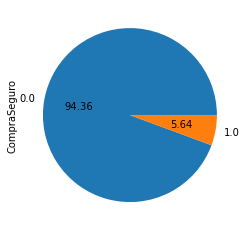

In [19]:
y.value_counts().plot(kind="pie", autopct="%.2f");

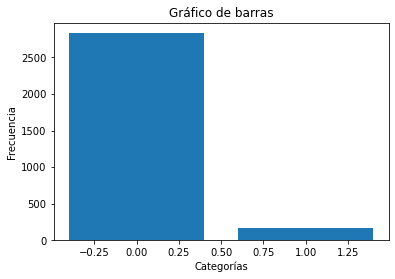

In [20]:
counts = y.value_counts()
x = counts.index
y_values = counts.values

# Crear el gráfico de barras
plt.bar(x, y_values)

# Personalizar el gráfico
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de barras')

# Mostrar el gráfico
plt.show()

## **Divisiòn Train y Test**
Evaluar la capacidad predictiva de un modelo consiste en comprobar aproxima sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

In [22]:
y_train.value_counts(normalize=True)

0.0    0.943783
1.0    0.056217
Name: CompraSeguro, dtype: float64

In [23]:
y_test.value_counts(normalize=True)

0.0    0.943333
1.0    0.056667
Name: CompraSeguro, dtype: float64

## **Modelo1**

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

**Enfoque Machine Learning**

In [24]:
# Crear una instancia del modelo de regresión logística
RegresionLogit_sklearn= LogisticRegression()
# Entrenar el modelo utilizando los datos de entrenamiento
RegresionLogit_sklearn.fit(x_train, y_train) # Entrando

/Users/osgaspar/opt/anaconda3/envs/Personal/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Error de Train**

In [25]:
y_train.value_counts()

0.0    1981
1.0     118
Name: CompraSeguro, dtype: int64

In [26]:
# Predicciones del Modelo en la base de Train
Prediccion_Train=RegresionLogit_sklearn.predict(x_train)

In [30]:
Prediccion_Train

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
y_train.value_counts()

0.0    1981
1.0     118
Name: CompraSeguro, dtype: int64

In [32]:
matriz= confusion_matrix(y_train,Prediccion_Train)

In [33]:
matriz

array([[1941,   40],
       [  94,   24]])

In [44]:
td1=pd.DataFrame(Prediccion_Train,columns=["Predicciones"])
td2=pd.concat([y_train.reset_index(drop=True),td1],axis=1)

In [46]:
td2.columns=["Realidad","Predicion"]

In [69]:
Matrix=pd.crosstab(td2["Realidad"],td2["Predicion"],margins=True)
Matrix

Predicion,0.0,1.0,All
Realidad,,,
0.0,1941,40,1981
1.0,94,24,118
All,2035,64,2099


In [70]:
Matrix_Normalizada=pd.crosstab(td2["Realidad"],td2["Predicion"],normalize=0)
Matrix_Normalizada

Predicion,0.0,1.0
Realidad,,
0.0,0.979808,0.020192
1.0,0.796610,0.203390


**Metricas de Error**

La precisión (accuracy en inglés) es una métrica comúnmente utilizada para evaluar la calidad de un modelo de aprendizaje automático o clasificación. En términos simples, el accuracy mide la proporción de predicciones correctas que realiza un modelo en relación con el total de predicciones realizadas.

El accuracy se calcula dividiendo el número de predicciones correctas por el número total de predicciones. Matemáticamente, se puede expresar de la siguiente manera:

Accuracy = (Número de predicciones correctas) / (Número total de predicciones)

In [73]:
Accuracy= (1941+24)/2099

In [74]:
Accuracy

0.9361600762267747

In [76]:
Accuracy_Train_RL=metrics.accuracy_score(y_train,Prediccion_Train)

In [77]:
Accuracy_Train_RL

0.9361600762267747

**Nota**

Esta métrica es especialmente útil cuando las clases están balanceadas, es decir, cuando el número de muestras en cada clase es similar. Sin embargo, puede ser engañosa en casos de desequilibrio de clases, donde una clase tiene muchas más muestras que otra. En estos casos, un modelo que simplemente prediga siempre la clase mayoritaria puede obtener un alto accuracy, pero puede ser ineficaz en la detección de la clase minoritaria.


In [78]:
Reporte_Train_RL=metrics.classification_report(y_train,Prediccion_Train)

In [80]:
print(Reporte_Train_RL)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1981
         1.0       0.38      0.20      0.26       118

    accuracy                           0.94      2099
   macro avg       0.66      0.59      0.62      2099
weighted avg       0.92      0.94      0.93      2099



Precision (Precisión): La precisión se refiere a la proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas por el modelo. Es una medida de cuán precisas son las predicciones positivas. Se calcula de la siguiente manera:

* Precision = Verdaderos positivos / (Verdaderos positivos + Falsos positivos)

In [81]:
Matrix

Predicion,0.0,1.0,All
Realidad,,,
0.0,1941,40,1981
1.0,94,24,118
All,2035,64,2099


Recall (Recuperación o Sensibilidad): El recall se refiere a la proporción de instancias positivas que el modelo predijo correctamente sobre el total de instancias positivas en los datos reales. Es una medida de la capacidad del modelo para identificar correctamente las instancias positivas. Se calcula de la siguiente manera:

Recall = Verdaderos positivos / (Verdaderos positivos + Falsos negativos)

**Alta precisión y alto recall**

Imaginemos que estás desarrollando un modelo de detección de spam para un cliente que administra un servicio de correo electrónico. La clase positiva representa los correos electrónicos legítimos (no spam). En este caso, un modelo con alta precisión y alto recall significa que el modelo es capaz de identificar correctamente la mayoría de los correos electrónicos legítimos y minimiza los falsos positivos, lo que garantiza que los correos electrónicos clasificados como legítimos sean altamente confiables y minimiza la posibilidad de que se clasifiquen como spam.

**Alta precisión y bajo recall**

Supongamos que estás construyendo un modelo de diagnóstico médico para detectar una enfermedad rara. La clase positiva representa los casos reales de la enfermedad. En este caso, un modelo con alta precisión y bajo recall implica que el modelo  logra detectar casi todos los casos positivos de la enfermedad, pero cuando hace una predicción positiva, No es confiable.

**Baja precisión y bajo recall**

Supongamos que estás desarrollando un modelo para identificar perros en imágenes. La clase positiva representa las imágenes de perros. En este caso, un modelo con baja precisión y bajo recall indica que el modelo no logra clasificar correctamente la mayoría de las imágenes de perros. Es posible que el modelo no esté capturando los patrones relevantes para distinguir los perros de otras clases y, por lo tanto, su rendimiento general es deficiente, con una alta tasa de falsos negativos (imágenes de perros clasificadas incorrectamente como no perros) y falsos positivos (imágenes no perro clasificadas incorrectamente como perros).

**Baja Precisión y Alto Recall**
Supongamos que estás construyendo un modelo de diagnóstico médico para detectar una enfermedad rara. La clase positiva representa los casos reales de la enfermedad. En este caso, un modelo con alta precisión y bajo recall implica que el modelo no logra detectar todos los casos positivos de la enfermedad, pero cuando hace una predicción positiva, es altamente confiable. Por lo tanto, aunque el modelo pueda perder algunos casos positivos, las predicciones positivas que realiza se pueden considerar bastante precisas y dignas de confianza.